# Black-Litterman allocation

The Black-Litterman method is a very powerful way of converting your views on asset returns, along with your uncertainty in these views, into a portfolio.

For a description of the theory, please read the [documentation page](https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html) and the links therein.

In this recipe, we will cover:

- Downloading data for the Black-Litterman method
- Constructing the prior return vector based on market equilibrium
- Two ways of constructing the uncertainty matrix
- Combining Black-Litterman with mean-variance optimization

## Downloading datas

In addition to price data, constructing a market prior requires market-caps.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb)
    
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb)
    
[![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb)
    
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb)

In [1]:
# !pip install pandas numpy matplotlib yfinance PyPortfolioOpt
# import os
# if not os.path.isdir('data'):
#     os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
#     os.chdir('PyPortfolioOpt/cookbook')

     |████████████████████████████████| 61 kB 8.7 MB/s 
     |████████████████████████████████| 6.4 MB 32.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.7 MB 55.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [209]:
data = pd.read_excel(r"C:\Users\ADMIN\Downloads\Black Letterman Model\Mock Data.xlsx")
tickers = data['Tickers'].to_list()

def get_current_price(symbol):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    return todays_data['Close'][0]

stock_price = []
for stock in tickers:
    if stock == 'USD' :
        stock_price.append(1.00)
        pass
    else:
        price = get_current_price(stock)
        stock_price.append(price)

data['Price'] = stock_price
data['Market Value'] = data['Quantity']*data['Price']
portfolio_value = data['Market Value'].sum()
print ('Total Portfolio Value in USD: '+str(round(portfolio_value,2)))
data['Current Weight'] = round(data['Market Value']/portfolio_value,4)

# model_run = 'Price Target'
model_run = 'Estimates'

if model_run == 'Price Target':
    data['Estimates'] = data['JPMSI Price Target']/data['Price'] - 1
elif model_run == 'Estimates':
    pass

data.to_excel(r"C:\Users\ADMIN\Downloads\Black Letterman Model\Mock Data.xlsx", index = False)
print (tickers)
data

Total Portfolio Value in USD: 1006958.25
['AMZN', 'META', 'TSLA', 'COST', 'WMT', 'JPM', 'JNJ', 'CVS', 'USD']


,Tickers,Sectors,Quantity,Price,Market Value,Current Weight,Prior Market Returns,JPMSI Price Target,Estimates,Confidence Levels,Post Market Returns,Post Model Quantity,Post Market Value,Post Market Weight,Portfolio Movement
0,AMZN,TECH,323,94.230003,30436.291084,0.0302,0.141515,97,0.13000,0,0.129934,3523.0,329400.50,0.327869,3200.00
1,META,TECH,414,174.940002,72425.161011,0.0719,0.064980,180,0.06300,0,0.060604,772.0,131541.08,0.130929,358.00
2,TSLA,AUTOMOBILE,351,205.710007,72204.212357,0.0717,0.058158,210,0.06664,0,0.066210,731.0,143919.28,0.143250,380.00
3,COST,RETAIL,398,484.179993,192703.637085,0.1914,0.055666,450,0.03000,0,0.030207,39.0,19055.79,0.018967,-359.00
4,WMT,RETAIL,387,142.130005,55004.311890,0.0546,0.086468,138,0.06000,0,0.059029,819.0,116682.93,0.116140,432.00
5,JPM,FINANCE,340,143.350006,48739.002075,0.0484,0.045888,125,0.05000,0,0.050618,582.0,82021.26,0.081640,242.00
6,JNJ,HEALTH,401,153.259995,61457.257797,0.0610,0.068427,160,0.04000,0,0.039766,365.0,56929.05,0.056664,-36.00
7,CVS,HEALTH,347,83.540001,28988.380318,0.0288,0.068321,87,0.08000,0,0.061718,1458.0,125052.66,0.124471,1111.00
8,USD,CASH,445000,1.000000,445000.000000,0.4419,1.000000,1,0.00000,0,0.000000,NaN,69.31,0.000069,-444930.69


In [210]:
tickers.remove('USD')
ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.to_excel('Prices.xlsx')
prices.tail()

[*********************100%***********************]  8 of 8 completed


,AMZN,COST,CVS,JNJ,JPM,META,TSLA,WMT
Date,,,,,,,,
2023-02-22,95.790001,497.390015,87.209999,157.779999,138.559998,171.119995,200.860001,144.240005
2023-02-23,95.820000,493.140015,86.870003,157.729996,139.669998,172.039993,202.070007,142.089996
2023-02-24,93.500000,488.609985,85.769997,155.970001,140.929993,170.389999,196.880005,142.470001
2023-02-27,93.760002,487.029999,84.839996,155.630005,142.160004,169.539993,207.630005,141.440002
2023-02-28,94.230003,484.179993,83.540001,153.259995,143.350006,174.940002,205.710007,142.130005


In [211]:
market_prices = yf.download("SPY", period="max")["Adj Close"]
market_prices.to_excel('Market Prices.xlsx')
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
1993-01-29    25.218227
1993-02-01    25.397581
1993-02-02    25.451391
1993-02-03    25.720434
1993-02-04    25.828056
Name: Adj Close, dtype: float64

In [19]:
from datetime import date
from pandas_datareader import data as pd_data

# mcaps = {}
# for t in tickers:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]

def load_mkt_caps(symbols, curr_date):
    print('loading market cap data')
    mcaps = pd_data.get_quote_yahoo(symbols)['marketCap']
    missing_mcap_symbols = mcaps[mcaps.isnull()].index
    for symbol in missing_mcap_symbols:
        if symbol == 'USD':
            pass
        else:
            print('attempting to find market cap info for', symbol)
            data = yfinance.Ticker(symbol)
            if data.info['quoteType'] == 'ETF' or data.info['quoteType'] == 'MUTUALFUND': 
                mcap = (data.info['totalAssets'])
                print('adding market cap info for', symbol)
                mcaps.loc[symbol] = mcap
            else:
                print('Failed to find market cap for', symbol)
                sys.exit(-1)
    return mcaps

mcaps = (load_mkt_caps(tickers,date.today()))
# pd.set_option('display.float_format', lambda x: f'{x:.0f}')
# mcaps['USD'] = 0
mcaps

loading market cap data


AMZN    958122557440
META    441759924224
TSLA    622948057088
COST    216810422272
WMT     384213090304
JPM     414807687168
JNJ     406191112192
CVS     110138105856
Name: marketCap, dtype: int64

## Constructing the prior

In [807]:
import pypfopt
pypfopt.__version__

'1.5.4'

In [22]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
S

,AMZN,COST,CVS,JNJ,JPM,META,TSLA,WMT
AMZN,0.138494,0.020319,0.013659,0.007802,0.027623,0.011426,0.013768,0.014792
COST,0.020319,0.060806,0.017086,0.012645,0.022929,0.004267,0.006187,0.023288
CVS,0.013659,0.017086,0.077699,0.016918,0.022756,0.003055,0.004685,0.021481
JNJ,0.007802,0.012645,0.016918,0.053062,0.017405,0.002856,0.003095,0.017178
JPM,0.027623,0.022929,0.022756,0.017405,0.089573,0.005588,0.008436,0.022084
META,0.011426,0.004267,0.003055,0.002856,0.005588,0.029437,0.011475,0.002390
TSLA,0.013768,0.006187,0.004685,0.003095,0.008436,0.011475,0.068449,0.003244
WMT,0.014792,0.023288,0.021481,0.017178,0.022084,0.002390,0.003244,0.072377


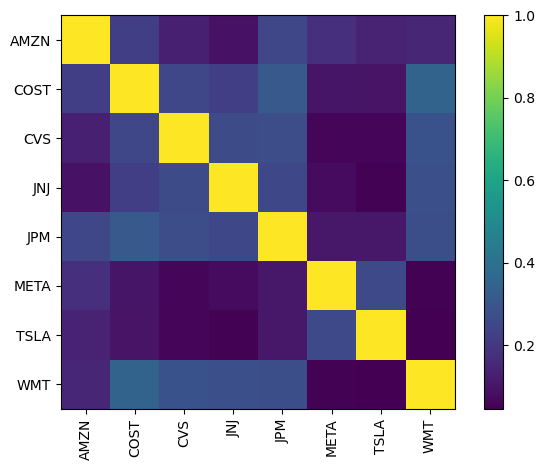

In [21]:
plotting.plot_covariance(S, plot_correlation=True);

In [23]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior_list = market_prior[0:].tolist()
market_prior_list.append(1)
data['Prior Market Returns'] = market_prior_list
data.to_excel(r"C:\Users\ADMIN\Downloads\Black Letterman Model\Mock Data.xlsx",index = False)
data

,Tickers,Sectors,Quantity,Price,Market Value,Current Weight,Prior Market Returns,JPMSI Price Target,Estimates,Confidence Levels,Post Market Returns,Post Model Quantity,Post Market Value,Post Market Weight,Portfolio Movement
0,AMZN,TECH,323,93.500000,30200.500000,0.0301,0.141515,97,0.13000,0,0.129934,1929.0,180361.50,0.179523,1606.00
1,META,TECH,414,170.389999,70541.459747,0.0702,0.064980,180,0.06300,0,0.060604,423.0,72074.97,0.071740,9.00
2,TSLA,AUTOMOBILE,351,196.880005,69104.881714,0.0688,0.058158,210,0.06664,0,0.066210,400.0,78752.00,0.078386,49.00
3,COST,RETAIL,398,488.609985,194466.774170,0.1936,0.055666,450,0.03000,0,0.030207,21.0,10260.81,0.010213,-377.00
4,WMT,RETAIL,387,142.470001,55135.890472,0.0549,0.086468,138,0.06000,0,0.059029,448.0,63826.56,0.063530,61.00
5,JPM,FINANCE,340,140.929993,47916.197510,0.0477,0.045888,125,0.05000,0,0.050618,319.0,44956.67,0.044748,-21.00
6,JNJ,HEALTH,401,155.970001,62543.970490,0.0623,0.068427,160,0.04000,0,0.039766,200.0,31194.00,0.031049,-201.00
7,CVS,HEALTH,347,85.769997,29762.188835,0.0296,0.068321,87,0.08000,0,0.061718,798.0,68444.46,0.068126,451.00
8,USD,CASH,445000,1.000000,445000.000000,0.4429,1.000000,1,0.00000,0,0.000000,NaN,454800.89,0.452686,9800.89


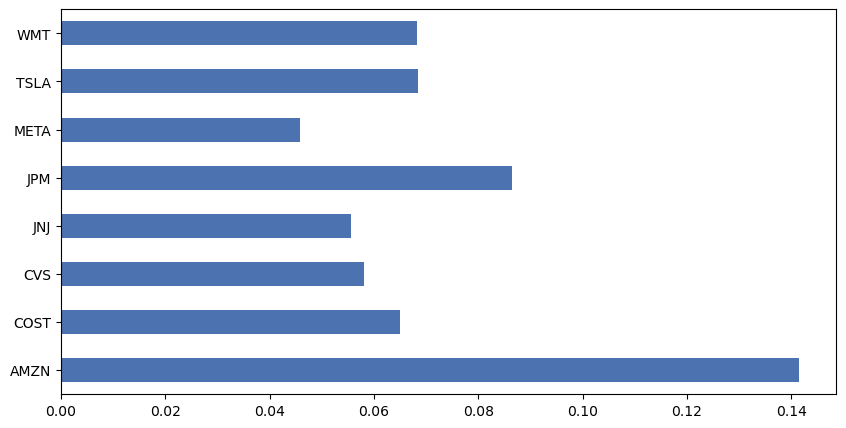

In [24]:
market_prior.plot.barh(figsize=(10,5));

## Views

In the BL method, views are specified via the matrix P (picking matrix) and the vector Q. Q contains the magnitude of each view, while P maps the views to the assets they belong to. 

If you are providing **absolute views** (i.e a return estimate for each asset), you don't have to worry about P and Q, you can just pass your views as a dictionary.

In [25]:
e_df = pd.DataFrame(data['Estimates'])
e_df = e_df.reset_index(drop=True)
e_df.index = data['Tickers'].to_list()
e_df = e_df.drop ('USD')
edict = e_df.to_dict('dict')['Estimates']
edict

{'AMZN': 0.13,
 'META': 0.063,
 'TSLA': 0.06663955095387575,
 'COST': 0.03,
 'WMT': 0.06,
 'JPM': 0.05,
 'JNJ': 0.04,
 'CVS': 0.08}

In [26]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=edict)

Black-Litterman also allows for relative views, e.g you think asset A will outperform asset B by 10%. If you'd like to incorporate these, you will have to build P and Q yourself. An explanation for this is given in the [docs](https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html#views).

## View confidences

In this section, we provide two ways that you may wish to construct the uncertainty matrix. The first is known as Idzorek's method. It allows you to specify a vector/list of percentage confidences.

In [27]:
confidences = data['Confidence Levels'].to_list()
del confidences[-1]
confidences

[0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=edict, omega="idzorek", view_confidences=confidences)

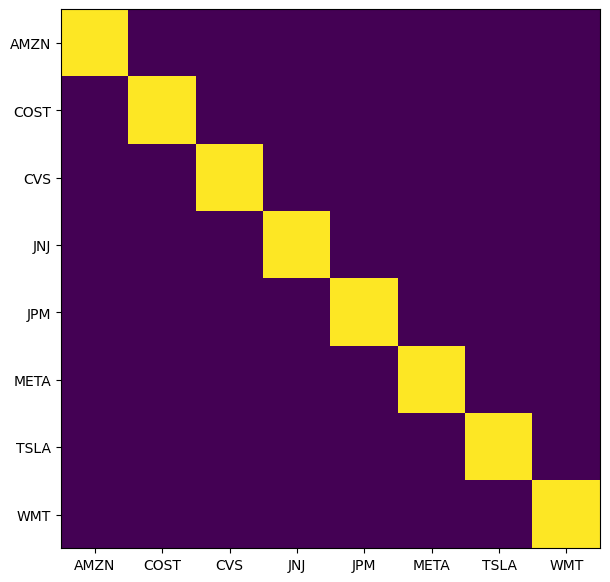

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [30]:
np.diag(bl.omega)

array([1000000., 1000000., 1000000., 1000000., 1000000., 1000000.,
       1000000., 1000000.])

Note how NAT, which we gave the lowest confidence, also has the highest uncertainty.

Instead of inputting confidences, we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences

In [31]:
intervals = [
    (0.08, 0.11),
    (0.05, 0.07),
    (0.05, 0.08),
    (0.025, 0.035),
    (0.04, 0.07),
    (0.04, 0.06),
    (0, 0.05),
    (0, 0.1)
]

In [32]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.000225, 0.00010000000000000005, 0.000225, 2.500000000000001e-05, 0.00022500000000000008, 9.999999999999996e-05, 0.0006250000000000001, 0.0025000000000000005]


## Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [33]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=edict, omega=omega)

In [34]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

AMZN    0.129934
COST    0.030207
CVS     0.061718
JNJ     0.039766
JPM     0.050618
META    0.060604
TSLA    0.066210
WMT     0.059029
dtype: float64

We can visualise how this compares to the prior and our views:

In [35]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(edict)], 
             index=["Prior", "Posterior", "Estimates"]).T
rets_df

,Prior,Posterior,Estimates
AMZN,0.141515,0.129934,0.13000
COST,0.064980,0.030207,0.03000
CVS,0.058158,0.061718,0.08000
JNJ,0.055666,0.039766,0.04000
JPM,0.086468,0.050618,0.05000
META,0.045888,0.060604,0.06300
TSLA,0.068427,0.066210,0.06664
WMT,0.068321,0.059029,0.06000


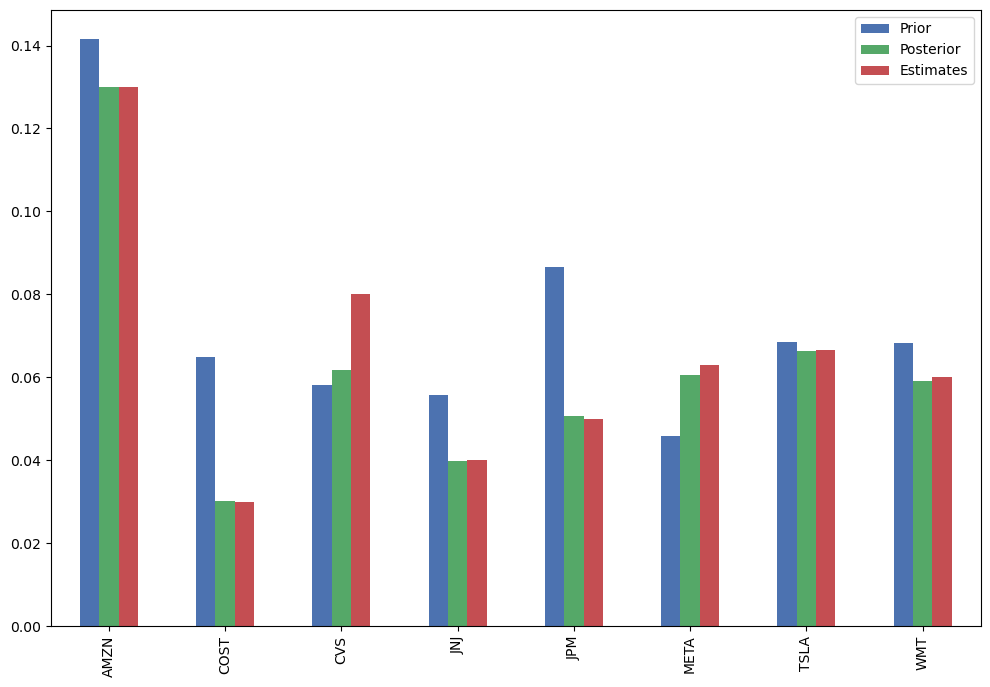

In [36]:
rets_df.plot.bar(figsize=(12,8));

Notice that the posterior is often between the prior and the views. This supports the fact that the BL method is essentially a Bayesian weighted-average of the prior and views, where the weight is determined by the confidence.

A similar but less intuitive procedure can be used to produce the posterior covariance estimate:

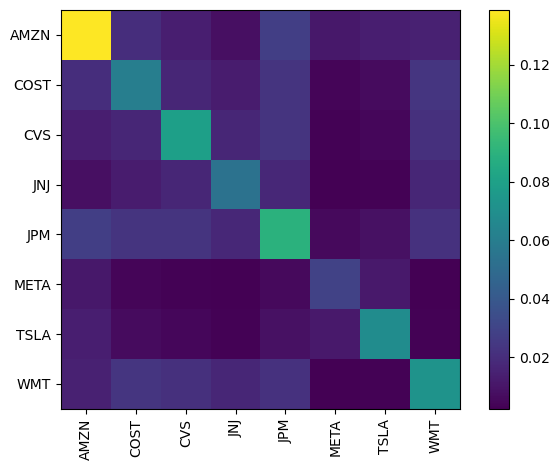

In [37]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

## Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [38]:
from pypfopt import EfficientFrontier, objective_functions

In [171]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

C:\Users\ADMIN\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:262: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AMZN', 0.32787),
             ('COST', 0.01891),
             ('CVS', 0.12443),
             ('JNJ', 0.05674),
             ('JPM', 0.08162),
             ('META', 0.13096),
             ('TSLA', 0.14333),
             ('WMT', 0.11614)])

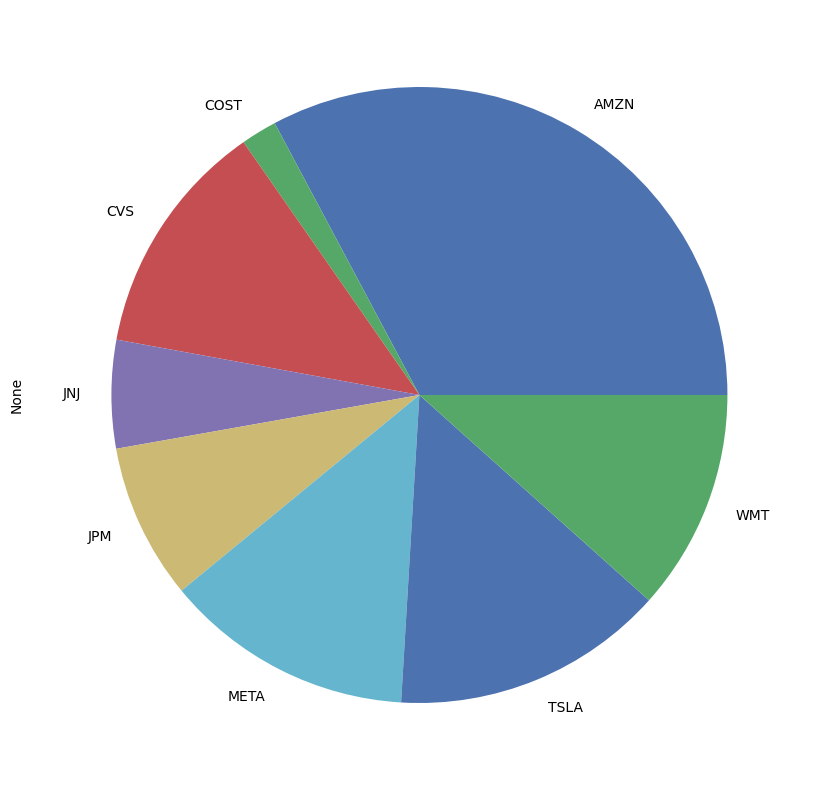

In [40]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [177]:
from pypfopt import DiscreteAllocation

cash_reserve = 0

da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=portfolio_value-cash_reserve)#(portfolio_value-cash_reserve) 559671
alloc, leftover = da.greedy_portfolio()
display(alloc)
leftover+cash_reserve

{'AMZN': 3523,
 'TSLA': 731,
 'META': 772,
 'CVS': 1458,
 'WMT': 819,
 'JPM': 582,
 'JNJ': 365,
 'COST': 39}

69.31812286376953

In [178]:
alloc ['USD'] = ''

In [179]:
for x in rets_df.index:
    y = rets_df.loc[x]['Posterior']
    data.loc[data['Tickers'] == x, 'Post Market Returns'] = y
    data.loc[data['Tickers'] == x, 'Post Model Quantity'] = alloc[x]

data['Market Value'] = round(data['Market Value'],2)
data ['Post Market Value'] = round((data['Post Model Quantity'] * data ['Price']),2)
post_model_portfolio_value = data ['Post Market Value']. sum()
data.loc[data['Tickers'] == 'USD', 'Post Market Value'] = round((portfolio_value- post_model_portfolio_value),2)
data ['Post Market Weight'] = data['Post Market Value'] / portfolio_value
data ['Portfolio Movement'] = (data['Post Model Quantity'] - data['Quantity'])
data.loc[data['Tickers'] == 'USD', 'Portfolio Movement'] = data['Post Market Value'] - data ['Market Value']
# if data.loc[0]['Current Weight'] == float:
#     data['Current Weight'] = round((data['Current Weight']*100),2).astype(str)+'%'
data.to_excel(r"C:\Users\ADMIN\Downloads\Black Letterman Model\Mock Data.xlsx",index = False)
data

,Tickers,Sectors,Quantity,Price,Market Value,Current Weight,Prior Market Returns,JPMSI Price Target,Estimates,Confidence Levels,Post Market Returns,Post Model Quantity,Post Market Value,Post Market Weight,Portfolio Movement
0,AMZN,TECH,323,93.500000,30200.50,0.0301,0.141515,97,0.13000,0,0.129934,3523.0,329400.50,0.327869,3200.00
1,META,TECH,414,170.389999,70541.46,0.0702,0.064980,180,0.06300,0,0.060604,772.0,131541.08,0.130929,358.00
2,TSLA,AUTOMOBILE,351,196.880005,69104.88,0.0688,0.058158,210,0.06664,0,0.066210,731.0,143919.28,0.143250,380.00
3,COST,RETAIL,398,488.609985,194466.77,0.1936,0.055666,450,0.03000,0,0.030207,39.0,19055.79,0.018967,-359.00
4,WMT,RETAIL,387,142.470001,55135.89,0.0549,0.086468,138,0.06000,0,0.059029,819.0,116682.93,0.116140,432.00
5,JPM,FINANCE,340,140.929993,47916.20,0.0477,0.045888,125,0.05000,0,0.050618,582.0,82021.26,0.081640,242.00
6,JNJ,HEALTH,401,155.970001,62543.97,0.0623,0.068427,160,0.04000,0,0.039766,365.0,56929.05,0.056664,-36.00
7,CVS,HEALTH,347,85.769997,29762.19,0.0296,0.068321,87,0.08000,0,0.061718,1458.0,125052.66,0.124471,1111.00
8,USD,CASH,445000,1.000000,445000.00,0.4429,1.000000,1,0.00000,0,0.000000,NaN,69.31,0.000069,-444930.69


In [180]:
port_mov = data[['Tickers','Quantity','Post Model Quantity','Portfolio Movement']]
port_mov

,Tickers,Quantity,Post Model Quantity,Portfolio Movement
0,AMZN,323,3523.0,3200.00
1,META,414,772.0,358.00
2,TSLA,351,731.0,380.00
3,COST,398,39.0,-359.00
4,WMT,387,819.0,432.00
5,JPM,340,582.0,242.00
6,JNJ,401,365.0,-36.00
7,CVS,347,1458.0,1111.00
8,USD,445000,NaN,-444930.69


In [181]:
port_wmov = data[['Tickers','Market Value','Current Weight','Post Market Weight']]
port_wmov['Change in Weights'] = port_wmov['Post Market Weight'] - port_wmov['Current Weight']
port_wmov

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12808\4220604492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_wmov['Change in Weights'] = port_wmov['Post Market Weight'] - port_wmov['Current Weight']


,Tickers,Market Value,Current Weight,Post Market Weight,Change in Weights
0,AMZN,30200.50,0.0301,0.327869,0.297769
1,META,70541.46,0.0702,0.130929,0.060729
2,TSLA,69104.88,0.0688,0.143250,0.074450
3,COST,194466.77,0.1936,0.018967,-0.174633
4,WMT,55135.89,0.0549,0.116140,0.061240
5,JPM,47916.20,0.0477,0.081640,0.033940
6,JNJ,62543.97,0.0623,0.056664,-0.005636
7,CVS,29762.19,0.0296,0.124471,0.094871
8,USD,445000.00,0.4429,0.000069,-0.442831


In [81]:
ef = EfficientFrontier(ret_bl, S_bl)
weight_constraints = [0.25,0,0.15,0,0,0,'rem',0.1]
weight_constraint_limits = [0,0,0,0,(0.1,0.12),0,0,0]
n = 0
for i in weight_constraints:
    if i == 0:
        pass
    elif i == 'rem':
        ef.add_constraint(lambda x : x[n] == 0)
    else:
        ef.add_constraint(lambda x : x[n] == i)
    n = n + 1
n = 0
for i in weight_constraint_limits:
    if type(i) == tuple:
        ef.add_constraint(lambda x : x[n] >= i[0])
        ef.add_constraint(lambda x : x[n] <= i[1])
    n = n + 1
ef.add_constraint(lambda x : x[2] <= 0.2)
ef.add_constraint(lambda x : x[2] >= 0.15)
ef.add_objective(objective_functions.L2_reg)
# ef.max_sharpe()
# weights = ef.clean_weights()
weights = ef.min_volatility()
display (weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMZN', 0.2500000000789844),
             ('COST', 0.1220040037719177),
             ('CVS', 0.1500000000625484),
             ('JNJ', 0.127264631060935),
             ('JPM', 0.1155731180185738),
             ('META', 0.1351582474608336),
             ('TSLA', 2.555034e-10),
             ('WMT', 0.1000000000896821)])

Expected annual return: 7.0%
Annual volatility: 16.4%
Sharpe Ratio: 0.31


(0.07043144207083615, 0.1641062181508061, 0.3073097572968988)

In [163]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
# ef.max_sharpe()
# weights = ef.clean_weights()
# weights = ef.efficient_return(0.1)
# weights = ef.min_volatility()
weights = ef.efficient_risk(0.125)
display (weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMZN', 0.0448406257686821),
             ('COST', 0.1084225881481788),
             ('CVS', 0.0934072244702967),
             ('JNJ', 0.1594869923259464),
             ('JPM', 0.0506408376340954),
             ('META', 0.3019362900523636),
             ('TSLA', 0.1442314047982898),
             ('WMT', 0.0970340367993662)])

Expected annual return: 5.7%
Annual volatility: 12.5%
Sharpe Ratio: 0.30


(0.057347878017161645, 0.12500000027570987, 0.29878302347827373)

In [191]:
# Plotting the risk contribution per asset

import riskfolio as rp

# Tickers of assets
assets = tickers
assets.sort()

# Downloading data
data = yf.download(assets)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

ModuleNotFoundError: No module named 'riskfolio'

In [201]:
from distutils.core import setup
from setuptools import setup


In [207]:
pip install Riskfolio-Lib

  Using cached Riskfolio-Lib-4.0.3.tar.gz (12.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for Riskfolio-Lib
Failed to build Riskfolio-Lib
  Running setup.py install for Riskfolio-Lib: started
  Running setup.py install for Riskfolio-Lib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [34 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\riskfolio
  copying riskfolio\__init__.py -> build\lib.win-amd64-cpython-39\riskfolio
  creating build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\AuxFunctions.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\ConstraintsFunctions.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\DBHT.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\GerberStatistic.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\HCPortfolio.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\OwaWeights.py -> build\lib.win-amd64-cpython-39\riskfolio\src
  copying riskfolio\src\ParamsEsti